## Импорт необходимых библиотек

In [ ]:
from mathtoolbox import *
from viewtoolbox import *

# Если есть желание сделать графики интерактивными (чтобы был зум и перемещение), 
# снимите комментарий с одной из следующих строчек:
# %matplotlib widget  
# %matplotlib qtagg

## Анализ сигнала с использованием спектрограмм и вейвлет-разложения

**Исходные параметры**

Константы:

$\bullet$ Частота дискретизации, ${f_d}$ - F_D;

$\bullet$ Период дискретизации, ${t_d}$ - T_D;

$\bullet$ Длительность импульса, ${t_{imp}}$ - T_IMPULSE;

$\bullet$ Длительность рассматриваемого интервала, ${T}$ - T_WINDOW;

$\bullet$ Частота несущей, ${f_{carr}}$ - F_CARRIER;

$\bullet$ Частота модуляции, ${f_{mod}}$ - F_MOD;

$\bullet$ Глубина модуляции, ${i}$ - I_MOD.

In [53]:
F_D = 10e6               # частота дискретизации, Гц
T_D = 1/F_D             # период дискретизации, с
T_IMPULSE = 40e-6       # длительность импульса, с
T_WINDOW = 80e-6        # длительность рассматриваемого интервала, с
F_CARRIER = 0.80e6      # частота несущей, Гц
F_MOD = 0.6e6           # частота модуляции, Гц
I_MOD = 0.8             # глубина модуляции

Изменяемые параметры:

$\bullet$ Количество импульсов - n_chips;

$\bullet$ Размер окна для построения спектрограммы - window_opt_len.

In [ ]:
n_chips = 8             # количество импульсов
window_opt_len = 320    # размер окна для построения спектрограммы

### 1. ЛЧМ импульсы

**Формирование последовательности отсчетов**

In [ ]:
s_c = generate_sequence('chirp', T_D, n_chips, T_IMPULSE, F_CARRIER);   # ЛЧМ импульсы

**Отображение сигнала во временной области**

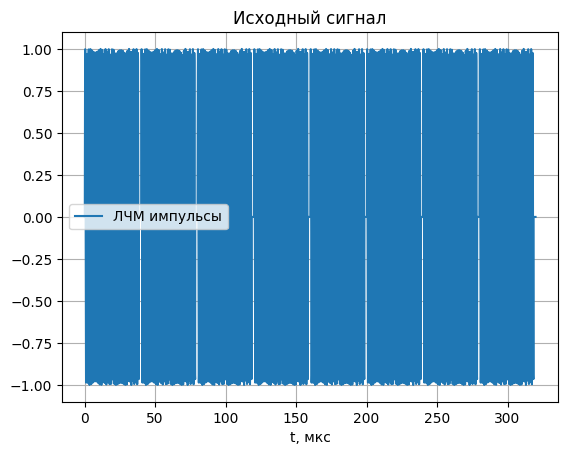

In [56]:
plot_signal([[T_D, s_c, 'ЛЧМ импульсы']])  # построение сигнала

**Анализ спектрограмм**

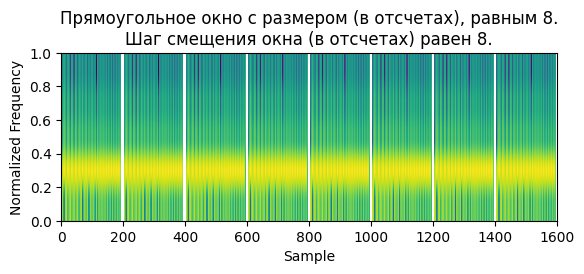

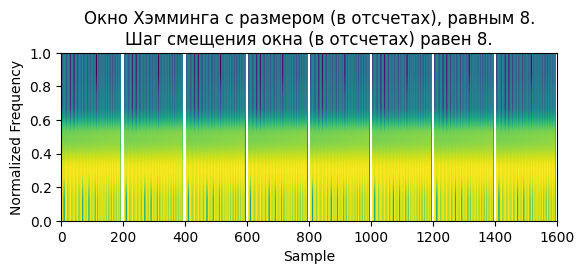

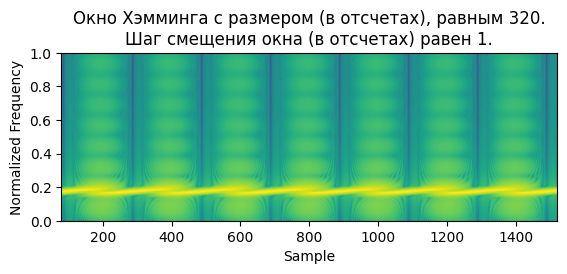

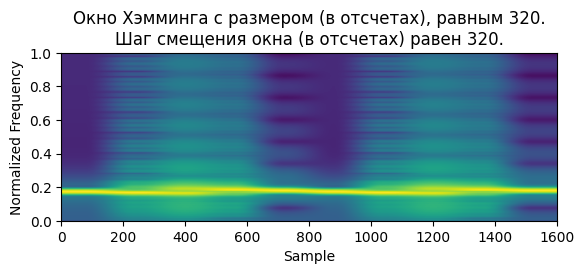

In [ ]:
# Построение спектрограммы с помощью прямоугольного окна малого размера с шагом в ширину окна
plot_spectrogram(s_c, window_name='Прямоугольное окно', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга малого размера с шагом в ширину окна
plot_spectrogram(s_c, window_name='Окно Хэмминга', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в один отсчет
plot_spectrogram(s_c, window_name='Окно Хэмминга', window_offset_step=1, window_opt_len=window_opt_len)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в ширину окна
plot_spectrogram(s_c, window_name='Окно Хэмминга', window_offset_step=window_opt_len, window_opt_len=window_opt_len)

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

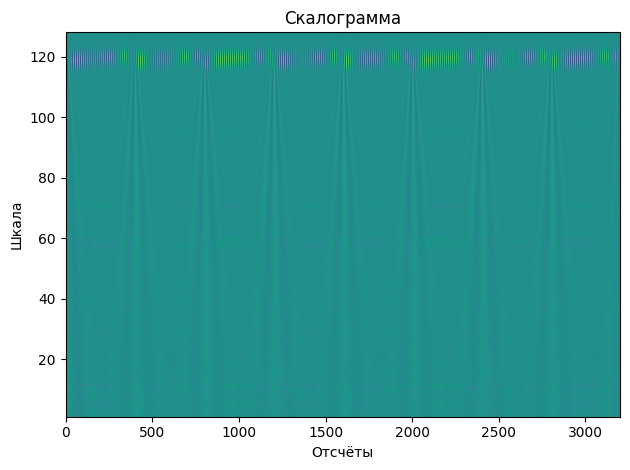

In [58]:
# Построение скейлограммы для ЛЧМ импульсов
plot_scalogramm(s_c, T_D)

### 2. Радиоимпульсы с псевдослучайной перестройкой частоты

**Формирование последовательности отсчетов**

In [ ]:
s_r = generate_sequence('radio', T_D, n_chips, T_IMPULSE, F_CARRIER);   # р/импульс

**Отображение сигнала во временной области**

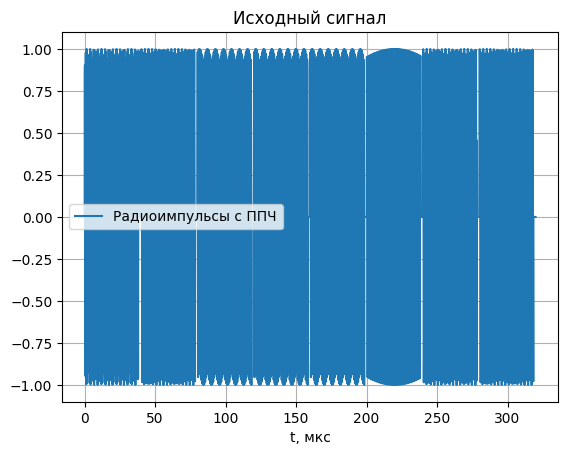

In [60]:
plot_signal([[T_D, s_r, 'Радиоимпульсы с ППЧ']])  # построение сигнала

**Анализ спектрограмм**

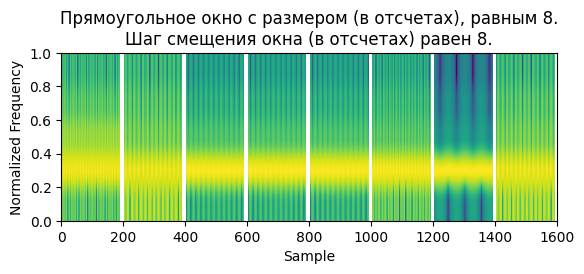

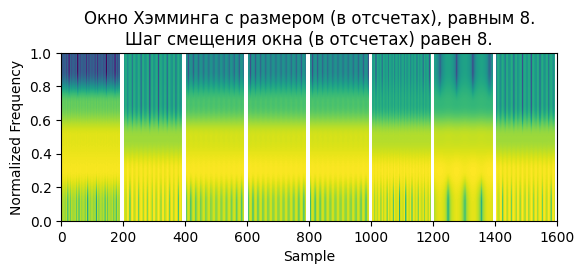

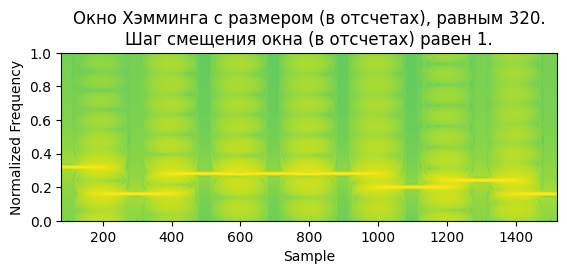

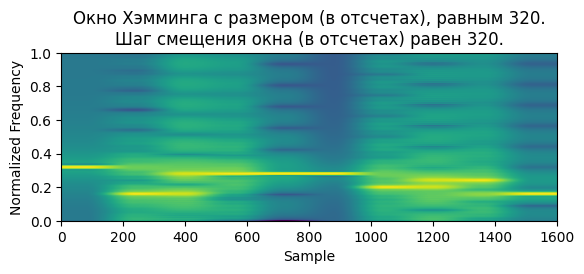

In [ ]:
# Построение спектрограммы с помощью прямоугольного окна малого размера с шагом в ширину окна
plot_spectrogram(s_r, window_name='Прямоугольное окно', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга малого размера с шагом в ширину окна
plot_spectrogram(s_r, window_name='Окно Хэмминга', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в один отсчет
plot_spectrogram(s_r, window_name='Окно Хэмминга', window_offset_step=1, window_opt_len=window_opt_len)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в ширину окна
plot_spectrogram(s_r, window_name='Окно Хэмминга', window_offset_step=window_opt_len, window_opt_len=window_opt_len)

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

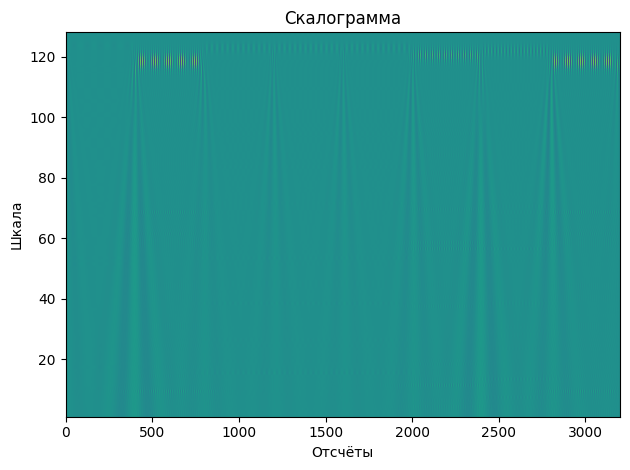

In [62]:
# Построение скейлограммы для радиоимпульсов с псевдослучайной перестройкой частоты
plot_scalogramm(s_r, T_D)

### 3. Амплитудно-модулированный сигнал

**Формирование последовательности отсчетов**

In [ ]:
s_am = generate_sequence('AM', T_D, n_chips, T_IMPULSE, F_CARRIER);     # АМ сигнал

**Отображение сигнала во временной области**

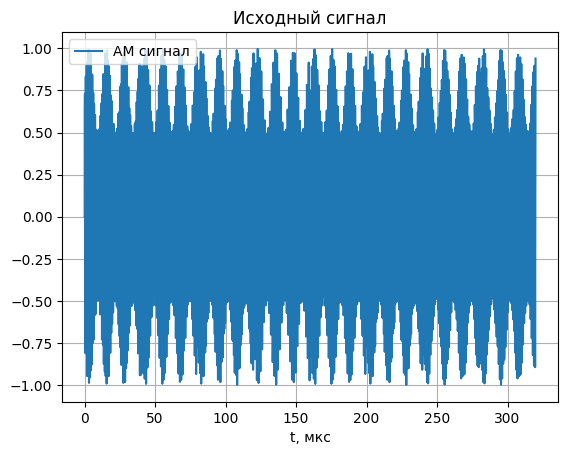

In [64]:
plot_signal([[T_D, s_am, 'АМ сигнал']])  # построение сигнала

**Анализ спектрограмм**

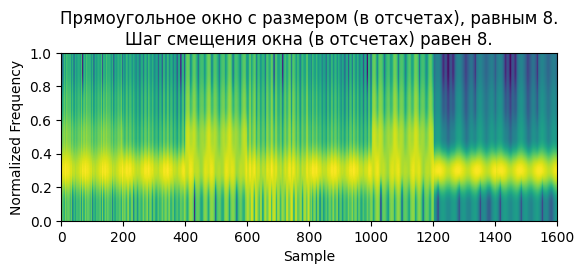

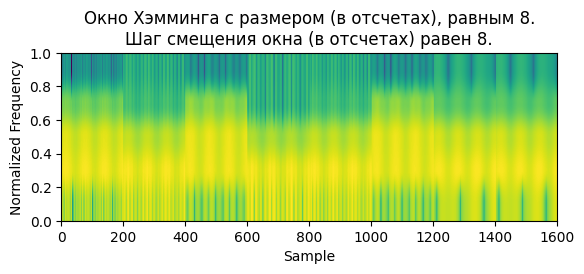

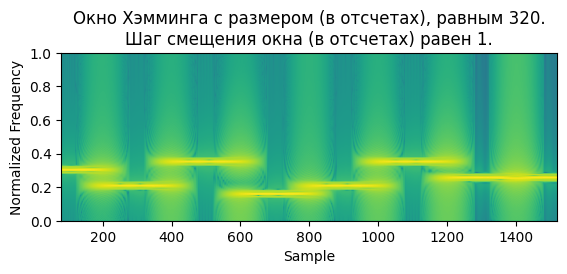

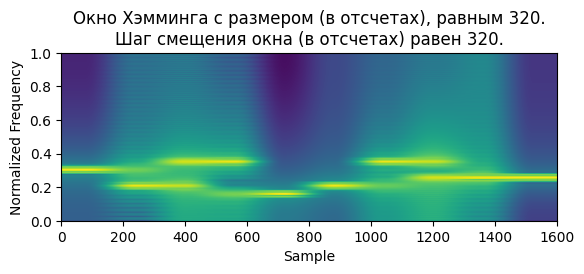

In [ ]:
# Построение спектрограммы с помощью прямоугольного окна малого размера с шагом в ширину окна
plot_spectrogram(s_am, window_name='Прямоугольное окно', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга малого размера с шагом в ширину окна
plot_spectrogram(s_am, window_name='Окно Хэмминга', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в один отсчет
plot_spectrogram(s_am, window_name='Окно Хэмминга', window_offset_step=1, window_opt_len=window_opt_len)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в ширину окна
plot_spectrogram(s_am, window_name='Окно Хэмминга', window_offset_step=window_opt_len, window_opt_len=window_opt_len)

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

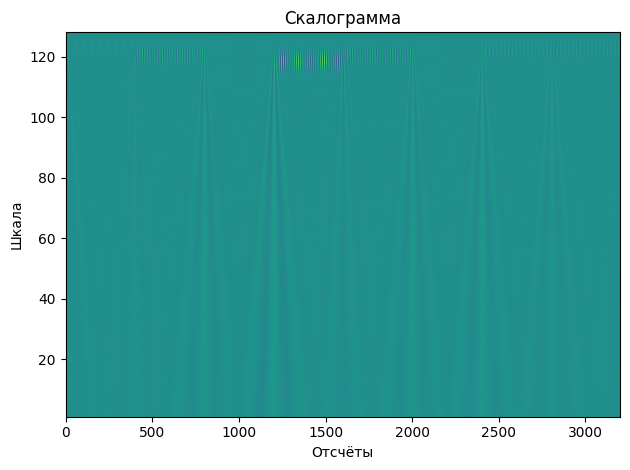

In [66]:
# Построение скейлограммы для АМ сигнала
plot_scalogramm(s_am, T_D)